# Determination of Steel Alloy Strength and Dominant metal additives in predicting strength
---
#Overview:

Dataset containing 312 steel types and the concentrations of 13 different metals in each: X, and their tensile strengths: Y, in csv format.

1. Preprocessing the dataset using pandas dataframe

2. Regression and prediction of steel tensile strengths using Machine Learning models: random forest regressor, and multilayer perceptron regressor.

3. Evaluation of model performances, optimization.

4. Determining feature importance: Which metal additives have large effects on strength? 









In [49]:
#Import libraries, import csv data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('drive/My Drive/steel_strength.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [50]:
# Preprocessing. Remove useless dimensions and split X features and Y ordinate

Y = df.loc[:,'tensile strength'].values
X = df.iloc[:,1:14].values
X = pd.DataFrame(X, columns = ['c','mn','si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti'])
Y = pd.DataFrame(Y, columns = ['Tensile Strength (MPa)'])
X.head()
Y = np.ravel(Y)


In [51]:
# Create train-test split to prevent training data leak in performance evaulation

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [52]:
#Create random forest regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay 
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators = 100, random_state=3)
RFR = model.fit(X_train, Y_train)


0.8592528969903345
Mean Relative Error: 0.05


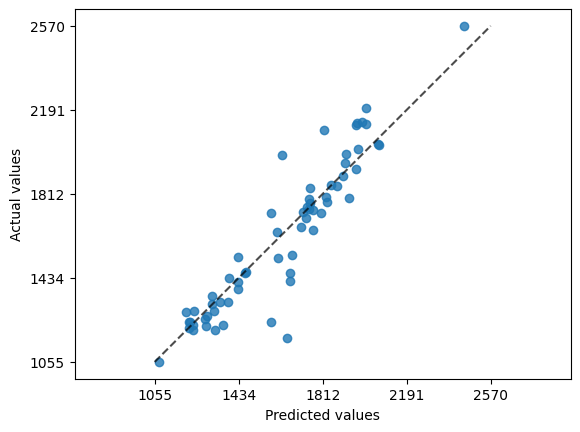

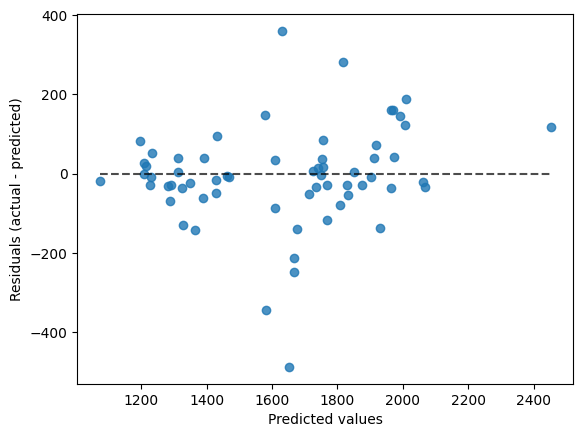

In [53]:
#Evaluate Accuracy of Regression using testing set

predictions = model.predict(X_test)
disp = PredictionErrorDisplay(y_true = Y_test, y_pred = predictions)
disp.plot(kind = 'actual_vs_predicted')
disp.plot()

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predictions)
print(r2_score(Y_test, predictions))
#ax = plt.scatter(Y_test, predictions)
#errors = abs((predictions - Y_test)/Y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

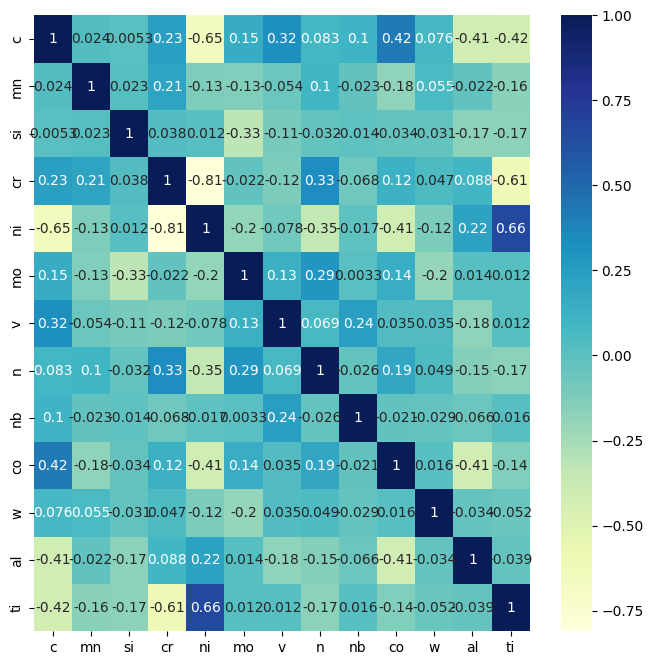

In [55]:
# Check the correlation of the Features with covariance matrix
import seaborn as sns
COV = X.copy()

plt.figure(figsize=(8,8))
sns.heatmap(COV.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [56]:
X.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [57]:
RFR = model.fit(X,Y)

Use Individual Conditional Expectation to determine which features have large effect on expectation.
This is not the most realistic method to show effect, because many features have some correlation with others that can change prediction of model.

In [34]:
#Initialize ICE Plot user-defined function
def ice_plot(model, X, feature_idx, feature_values, num_instances=200):
    X_selected = X.iloc[:num_instances].copy()
    ice_data = np.zeros((num_instances, len(feature_values)))
    
    for i, val in enumerate(feature_values):
        X_selected.iloc[:, feature_idx] = val
        ice_data[:, i] = model.predict(X_selected)
        
    return feature_values, ice_data

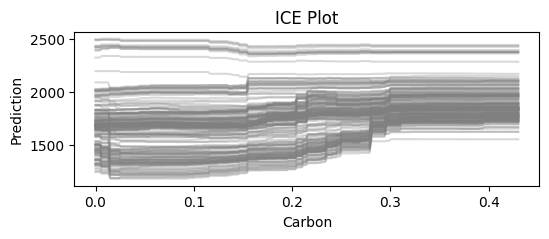

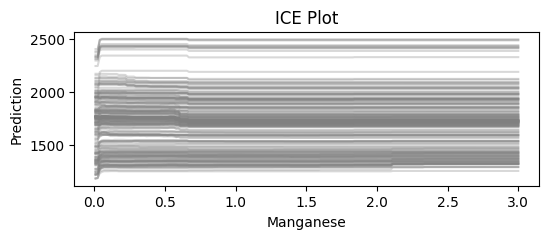

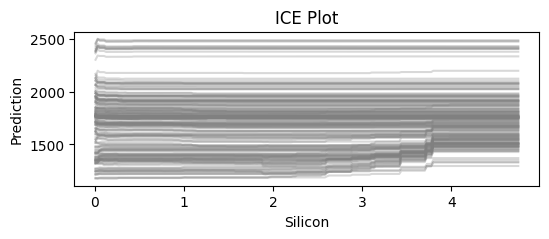

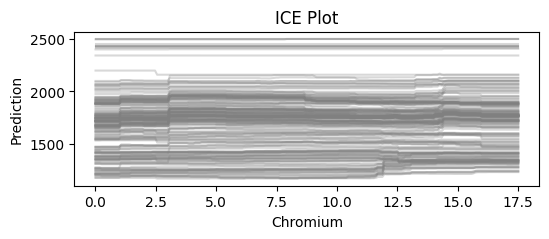

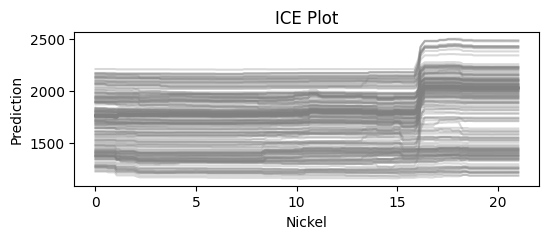

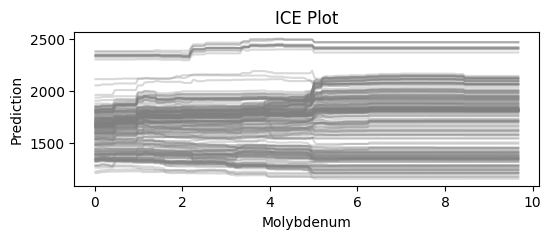

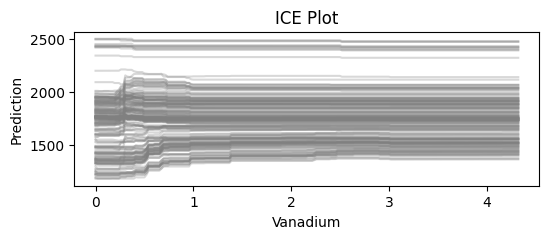

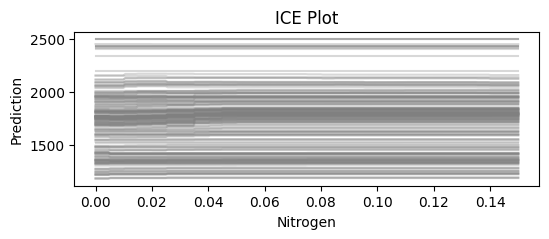

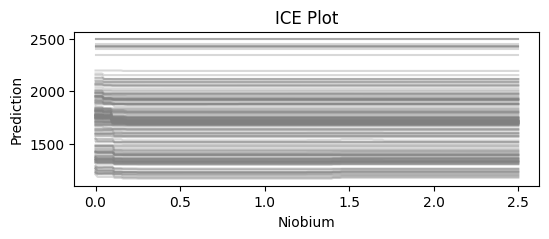

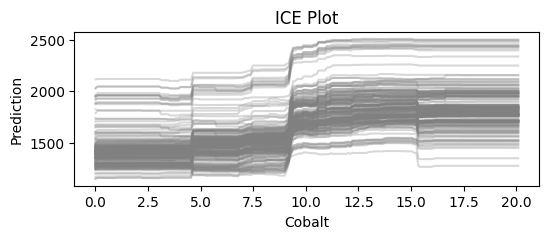

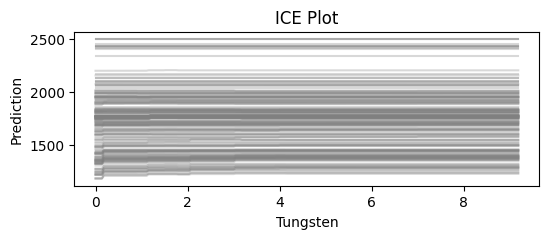

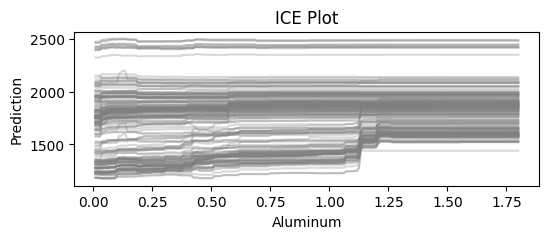

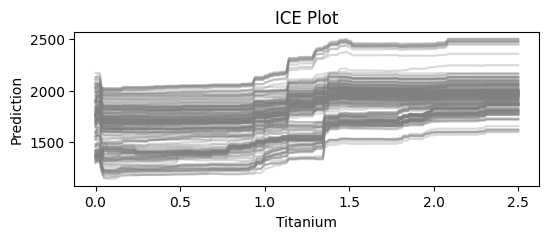

In [58]:
# Print out individual conditional expectation plots  
# Shows effect of changing each steel through the full range of concentration values for each element on model prediction 

names = ['Carbon', 'Manganese', 'Silicon', 'Chromium', 'Nickel', 'Molybdenum', 'Vanadium', 'Nitrogen', 'Niobium', 'Cobalt', 'Tungsten', 'Aluminum', 'Titanium']
for feature_idx, x in enumerate(names):
    
    feature_values = np.linspace(min(X.iloc[:, feature_idx]), max(X.iloc[:, feature_idx]), num=200)
    feature_values, ice_data = ice_plot(model, X, feature_idx, feature_values)
    plt.figure(figsize=(6, 2))
    for i in range(ice_data.shape[0]):
        plt.plot(feature_values, ice_data[i, :], c='gray', alpha=0.3)
        
    plt.xlabel(x)
    plt.ylabel('Prediction')
    plt.title('ICE Plot')
    plt.show()
    

In [37]:
#Shapley 
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.9 MB/s eta 0:00:00


Permutation explainer: 313it [02:38,  1.85it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


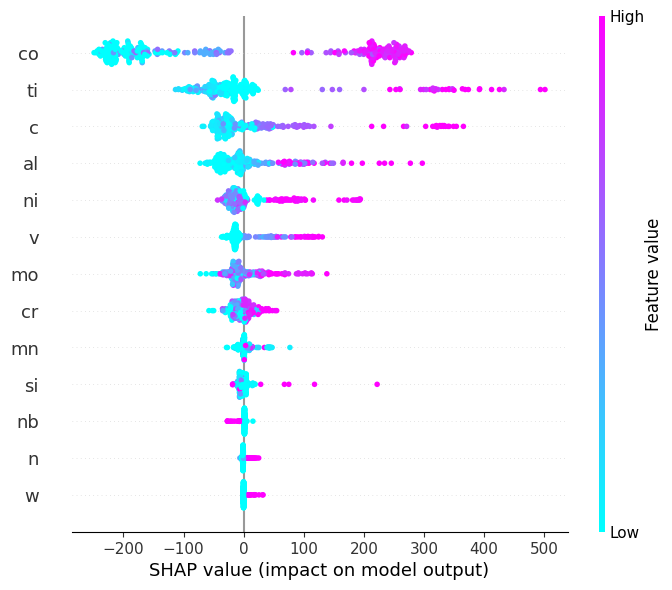

In [59]:
#Shapley values beeswarm plot. Shows which features have outweighted efect on predicitons according to game theory
import shap

X100 = shap.utils.sample(X, 100)

SHAPP = shap.Explainer(model.predict, X100)
sHap_Nos = SHAPP(X)

shap.plots.beeswarm(sHap_Nos, max_display=14, color=plt.get_cmap("cool"))


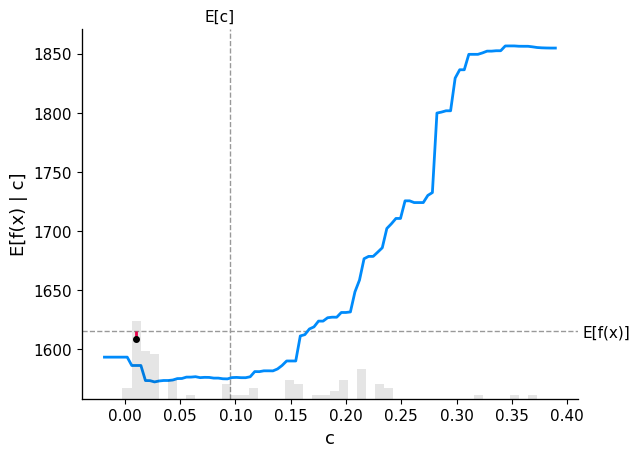

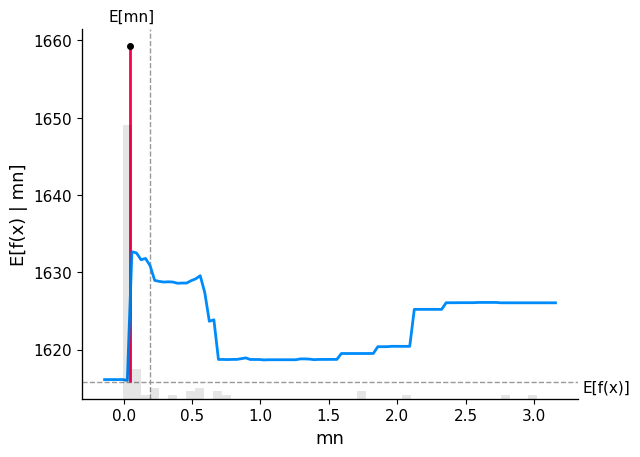

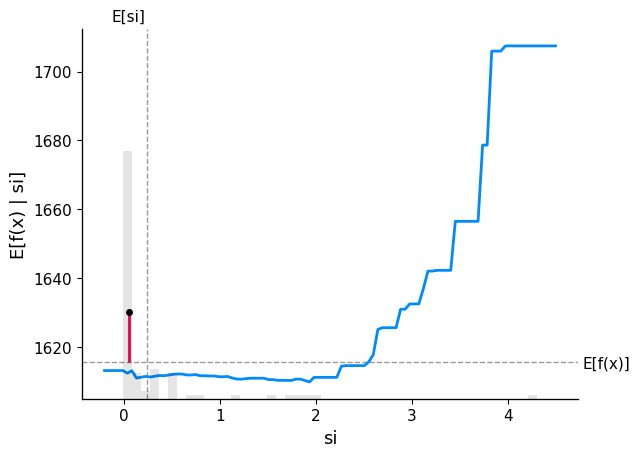

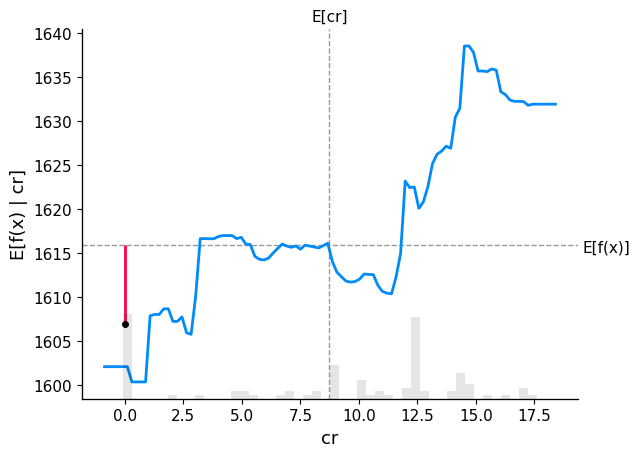

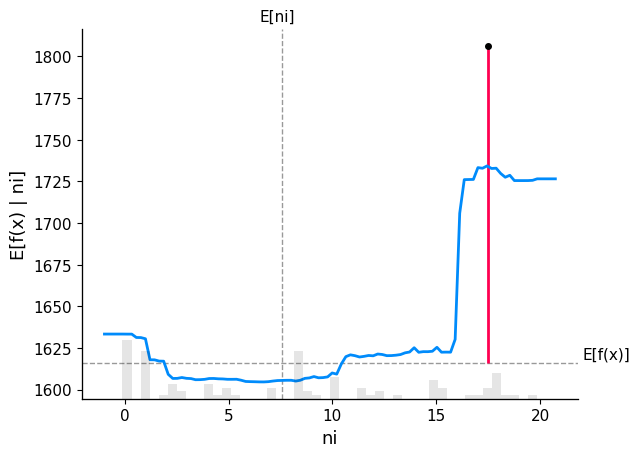

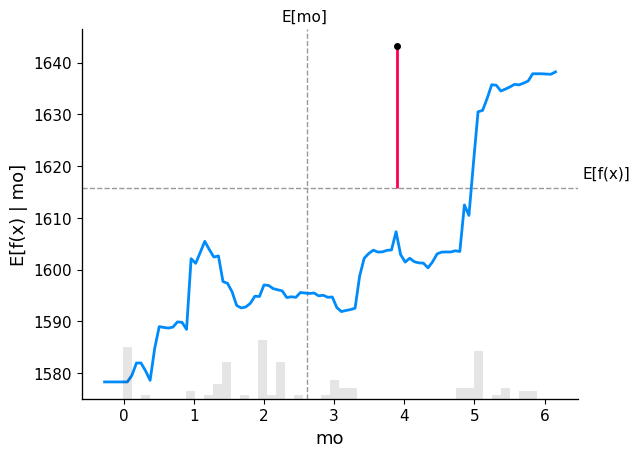

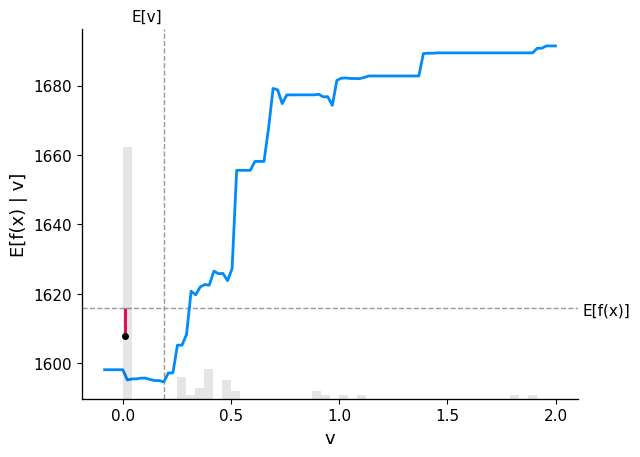

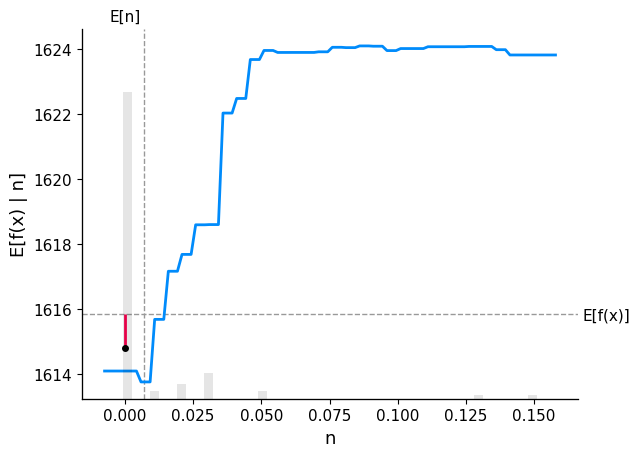

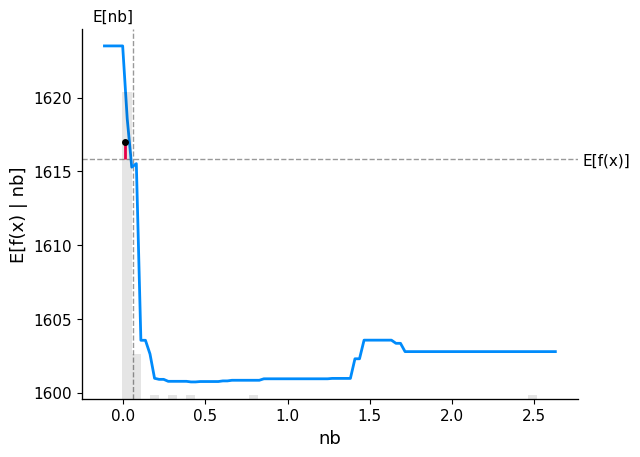

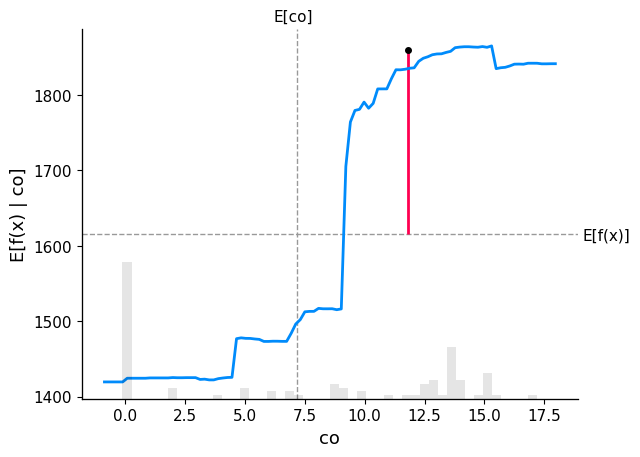

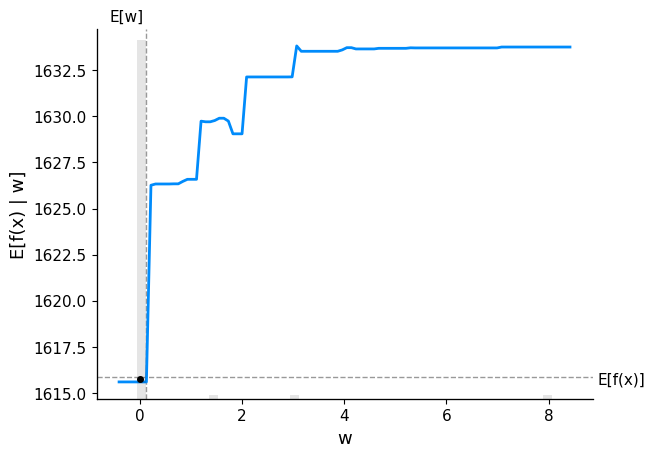

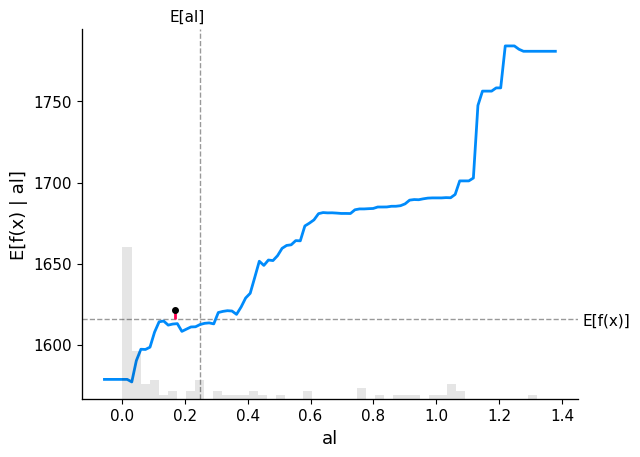

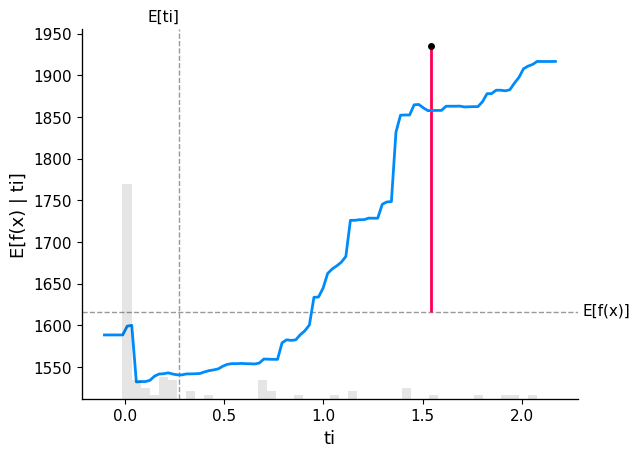

In [60]:
#Partial Dependence Plots to give approximate relationships between each feature and predicted value of strength.
names2 = ['c', 'mn',	'si',	'cr',	'ni',	'mo',	'v', 'n',	'nb',	'co',	'w',	'al',	'ti']
for L in names2:
    sample_ind = 30
    shap.partial_dependence_plot(
    L, model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=sHap_Nos[sample_ind:sample_ind+1,:])

In [48]:
#for L in names2:
    #shap.plots.scatter(sHap_Nos[:,L])